In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [175]:
data_path = "data.xlsx"
data = pd.read_excel(data_path)
data.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14


In [176]:
data.describe()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
count,5.881010e+05,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.960000,0.025239,24.820876,4.025533,14.469061
std,2.022260e+05,0.195959,0.156850,43.715181,2.004019,4.834634
min,9.000000e+05,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.143190e+06,1.000000,0.000000,4.000000,2.000000,11.000000
50%,1.313725e+06,1.000000,0.000000,13.000000,4.000000,14.000000
75%,1.484088e+06,1.000000,0.000000,27.000000,6.000000,18.000000
max,1.654483e+06,1.000000,1.000000,2065.000000,7.000000,23.000000


# Q1.

In [177]:
total_num_users = data.shape[0]
total_conversions = data[data['converted'] == 1].shape[0]
test_group = data[data['test'] == 1]
control_group = data[data['test'] == 0]
test_group_count, control_group_count = test_group.shape[0],  control_group.shape[0]
converted_from_test_grp = test_group[test_group['converted'] == 1]
converted_from_test_grp_count = converted_from_test_grp.shape[0]
converted_from_control_grp = control_group[control_group['converted'] == 1]
converted_from_control_grp_count = converted_from_control_grp.shape[0]
print(f'Total number of identified users: {total_num_users}')
print(f'Total number of converted users: {total_conversions}\n')
print(f'Total number of users exposed to advertising (Test Group): {test_group_count}')
print(f'Total number of users not exposed to advertising (Control Group): {control_group_count}\n')
print(f'Number of Users that bought the handbag in Test Group: {converted_from_test_grp_count}')
print(f'Number of Users that bought the handbag in Control Group: {converted_from_control_grp_count}\n')

percent_conv_rate_test = converted_from_test_grp_count / test_group_count
percent_conv_rate_control = converted_from_control_grp_count / control_group_count
print(f'Percentage convertion rate of users (Test Group): {round(percent_conv_rate_test * 100, 4)}%')
print(f'Percentage convertion rate of users (Control Group): {round(percent_conv_rate_control * 100, 4)}%\n')

print(f'Percentage of user converted because of ad campaign: {round((percent_conv_rate_test - percent_conv_rate_control) * 100, 4)}%')

Total number of identified users: 588101
Total number of converted users: 14843

Total number of users exposed to advertising (Test Group): 564577
Total number of users not exposed to advertising (Control Group): 23524

Number of Users that bought the handbag in Test Group: 14423
Number of Users that bought the handbag in Control Group: 420

Percentage convertion rate of users (Test Group): 2.5547%
Percentage convertion rate of users (Control Group): 1.7854%

Percentage of user converted because of ad campaign: 0.7692%


## Discussion Q1 - 

### Was the advertising campaign effective? Did additional consumers convert as a result of the ad campaign?

## Answer 1 - 

Yes, the campaign was effective. In the test group, a conversion rate of 2.5547% was witnessed which is much higher than 1.7854%, the conversion rate of the control group. It was also ensured that the size of the control group is sufficient to detect lift. Thus, with 4% control group, we can safely conclude that the results are valid and demonstrate the effectiveness of the ad campaign.

# Q2 (a)

In [178]:
num_users_converted_in_test_group_if_no_ad = percent_conv_rate_control * test_group_count
num_users_converted_in_test_group_with_ad = converted_from_test_grp_count
net__additional_num_user_converted = num_users_converted_in_test_group_with_ad - num_users_converted_in_test_group_if_no_ad
converting_user_worth = 40
print(f"Number of users converted in test group if no ad: {round(num_users_converted_in_test_group_if_no_ad, 4)}")
print(f"Number of users converted in test group with ad: {num_users_converted_in_test_group_with_ad}")
print(f"Net additional numbber of users converted in test group due to ad: {round(net__additional_num_user_converted, 4)}")
print(f"Converting user worth: ${converting_user_worth}")
total_profit = net__additional_num_user_converted * converting_user_worth
print(f"Total profit: ${round(total_profit, 4)}")

Number of users converted in test group if no ad: 10080.0179
Number of users converted in test group with ad: 14423
Net additional numbber of users converted in test group due to ad: 4342.9821
Converting user worth: $40
Total profit: $173719.2858


## Answer 2 (a).

The control group was not sent the ads. 

The number of users in the Test group that TaskaBella would have converted if there were no ads sent would be: the conversion rate without ads times the number of users in the Test group - which is approximately ~10,080. Let this be n number of users. n = 10080.

The additional users that TaskaBella was able to convert due to the ad campaign is equal to the number of user converted in Test Group, which is 14423. Let this be m number of users. m = 14423.

The net additional number of users that TaskaBella was able to convert due to ad campaign is n - m = 14423 - 10080 = approx. 4342. 

With each converted user worth \$40, and excluding advertising costs, TaskaBella made \$173719.2858 more money by running the campaign.

# Q2 (b)

In [179]:
tot_impr = data['tot_impr'].sum()
avg_cpm = 9
total_ad_cost = avg_cpm * (tot_impr / 1000)
print(f"Total number of impressions: {tot_impr}")
print(f"Average CPM: ${avg_cpm}")
print(f"Total ad cost: ${total_ad_cost}")

Total number of impressions: 14597182
Average CPM: $9
Total ad cost: $131374.638


## Answer 2 (b).

The total number of impressions were 14,597,182.
The costs of impressions per thousand (CPM) was $9.

The total advertisement cost would thus be (14,597,182 / 1000) * 9 = $131374.638.
This was the cost of the campaign.

# Q2 (c)

In [180]:
net_profit = total_profit - total_ad_cost
total_ROI = (net_profit / total_ad_cost) * 100
print(f"Additional Money made due to ads: ${round(total_profit, 4)}")
print(f"Total cost of campaign: ${total_ad_cost}\n")
print(f"Net Profit: $ {round(net_profit, 4)}")
print(f"Total ROI: {round(total_ROI, 4)}%")

Additional Money made due to ads: $173719.2858
Total cost of campaign: $131374.638

Net Profit: $ 42344.6478
Total ROI: 32.232%


## Answer 2 (c).

The additional money made due to the ads is $173719.2858.

The total advertisement cost is $131374.638.

Thus, the net profit of the campaign is (total profit - cost) = $42344.6478.


The return on investment (ROI) of the campaign is 32.232%.

Yes, the campaign was profitable as ROI was 32.232%.

# Q2 (d)

In [181]:
total_conversion_in_control_group_if_it_was_test = control_group_count * percent_conv_rate_test
curr_converion_control_group = converted_from_control_grp_count
additional_conversion_if_no_control_group = total_conversion_in_control_group_if_it_was_test - curr_converion_control_group
opportunity_cost_if_no_control_group = additional_conversion_if_no_control_group * converting_user_worth
print(f"Total number of conversions in control group with test group convertion rate: {round(total_conversion_in_control_group_if_it_was_test, 4)}")
print(f"Total number of conversions in control group without ads: {curr_converion_control_group}")
print(f"Additional conversions if no control group (one test group with all users): {round(additional_conversion_if_no_control_group, 4)}\n")
print(f"Opportunity cost (no control group): ${round(opportunity_cost_if_no_control_group, 4)}")

Total number of conversions in control group with test group convertion rate: 600.9573
Total number of conversions in control group without ads: 420
Additional conversions if no control group (one test group with all users): 180.9573

Opportunity cost (no control group): $7238.2908


### Let us explore different control group sizes and the changes in opportunity costs

You can change the value of the variable below to see the different effects of having different control group sizes.

In [182]:
# Set the control group size in percentage, e.g. 2 for 2% of user population
ctrl_group_size = 2

In [183]:
def calc_opp_cost(control_group_size, is_print):
    new_control_group = (control_group_size / 100) * total_num_users
    new_test_group = ((100 - control_group_size) / 100) * total_num_users

    new_num_conv_ctrl_grp = new_control_group * percent_conv_rate_control
    new_num_conv_test_grp = new_test_group * percent_conv_rate_test
    if is_print:
        print(f"If we change the size of the control group to {control_group_size}% of the user population. Then, the following would happen:\n")
        print(f"The number of people in the control group would be {control_group_size}% of the user population: {new_control_group}")
        print(f"The number of people in the test group would be {100 - control_group_size}% of the user population: {new_test_group}\n")
        print(f"The number of conversions in the control group would be: {round(new_num_conv_ctrl_grp, 4)}")
        print(f"The number of conversions in the test group would be: {round(new_num_conv_test_grp, 4)}")

    if control_group_size < 4:
        new_user_in_test_grp = new_test_group - test_group_count
        users_converted_if_in_ctrl_grp = new_user_in_test_grp * percent_conv_rate_control
        users_converted_now_in_test_grp = new_user_in_test_grp * percent_conv_rate_test
        additional_conversions_in_test_grp = users_converted_now_in_test_grp - users_converted_if_in_ctrl_grp

        new_opp_cost = additional_conversions_in_test_grp * converting_user_worth
        if is_print:
            print(f"\nWe had {test_group_count} users in the test group earlier.")
            print(f"Now, we have {new_test_group} users in the test group if only {control_group_size}% of the user population in control group instead of 4%.")
            print(f"Out of the {control_group_size}% user population that moved from control group to test group:")
            print(f"{round(users_converted_if_in_ctrl_grp, 4)} users would have converted if they were in the control group.")
            print(f"However, now {round(users_converted_now_in_test_grp, 4)} convert in the test group due to the higher conversion rate.")
            print(f"Additional users converted is {round(additional_conversions_in_test_grp, 4)}.\n")
            print(f"New opportunity cost is ${round(new_opp_cost, 4)}.\n")
        return new_opp_cost

calc_opp_cost(ctrl_group_size, True)
ctrl_grp_sizes = [0, 1, 2, 3]
for ctrl_size in ctrl_grp_sizes:
    opp_cost = calc_opp_cost(ctrl_size, False)
    print(f"Control Group Size: {ctrl_size} - Opportunity Cost: ${round(opp_cost, 4)}")


If we change the size of the control group to 2% of the user population. Then, the following would happen:

The number of people in the control group would be 2% of the user population: 11762.02
The number of people in the test group would be 98% of the user population: 576338.98

The number of conversions in the control group would be: 210.0004
The number of conversions in the test group would be: 14723.4781

We had 564577 users in the test group earlier.
Now, we have 576338.98 users in the test group if only 2% of the user population in control group instead of 4%.
Out of the 2% user population that moved from control group to test group:
209.9996 users would have converted if they were in the control group.
However, now 300.4781 convert in the test group due to the higher conversion rate.
Additional users converted is 90.4785.

New opportunity cost is $3619.1392.

Control Group Size: 0 - Opportunity Cost: $7238.2908
Control Group Size: 1 - Opportunity Cost: $5428.715
Control Group S

## Answer 2 (d).

Assuming that there was no control group, we would see the conversion rate of the test group for the current control group as well. 

The total number of conversions in the control group without without specific ads is 420. If there was no control group, for the same 4% of the population we currently have in the control group, we would see the conversion rate of test group. This would make the total number of conversions for that 4% population, the current control group to be approximately 600.

The additional conversions we would have if there was no control group are approximately 180. 

Thus, the opportunity cost (no control group) would be $7238.2908

Similarly, after analysing differen control group sizes, we found the following opportunity costs:

Control group population size and corresponsing opportunity costs:

0% - $ 7238.2908

1% - $ 5428.715

2% - $ 3619.1392

3% - $ 1809.5635


# Q3 (a)

In [205]:
def plot_graph(group_conv_rate, group_edges, color, case):
    plt.figure(figsize=(20, 12))
    x_labels_compute = []
    for i in range(len(group_edges)):
        x_labels_compute.append(str(group_edges[i][0]) + "-" + str(group_edges[i][1]))

    bars = plt.bar(x_labels_compute, group_conv_rate, color = color, edgecolor = "black")

    for bar, rate in zip(bars, group_conv_rate):
        if not (np.isnan(rate) or np.isinf(rate)):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{rate:.2f}%", ha = 'center', va = 'bottom', fontsize = 6, color = color)

    plt.xticks(rotation = 20, fontsize = 7)
    plt.xlabel("Total Impressions")
    plt.ylabel("Conversion Percentage%")
    plt.title("Conversion Percentage vs Total Impressions for " + str(case) + " group")
    plt.show()

In [206]:
def compute_graphs(dataframe, color, case):
    curr_df = dataframe.copy()
    curr_df["groups"] = pd.qcut(curr_df["tot_impr"], q = 100, duplicates = "drop")
    group_data = curr_df.groupby("groups")
    group_conversion_rate = (group_data["converted"].sum() / group_data["converted"].count()) * 100
    
    num_people_each_group = group_data.size()
    #print(num_people_each_group)
    
    group_edges = []
    for curr_group in curr_df["groups"].cat.categories:
        leftval = 0
        if curr_group.left >= 0:
            leftval = int(curr_group.left)
        group_edges.append((leftval, int(curr_group.right)))

    plot_graph(group_conversion_rate, group_edges, color, case)

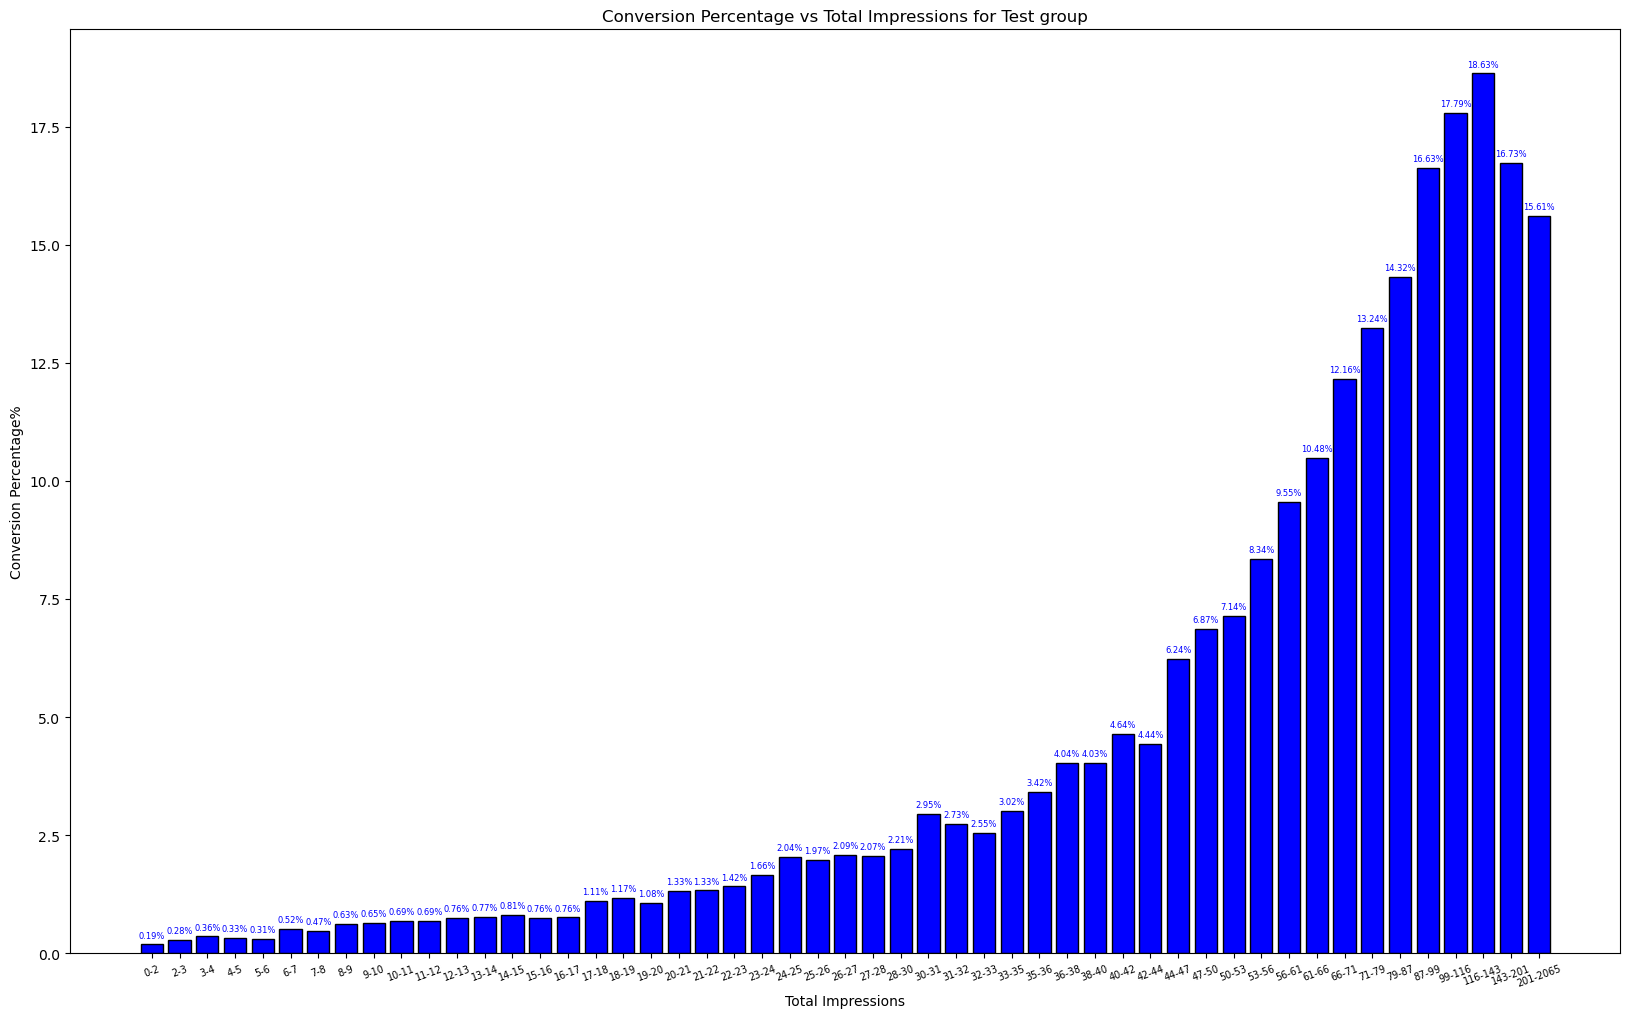

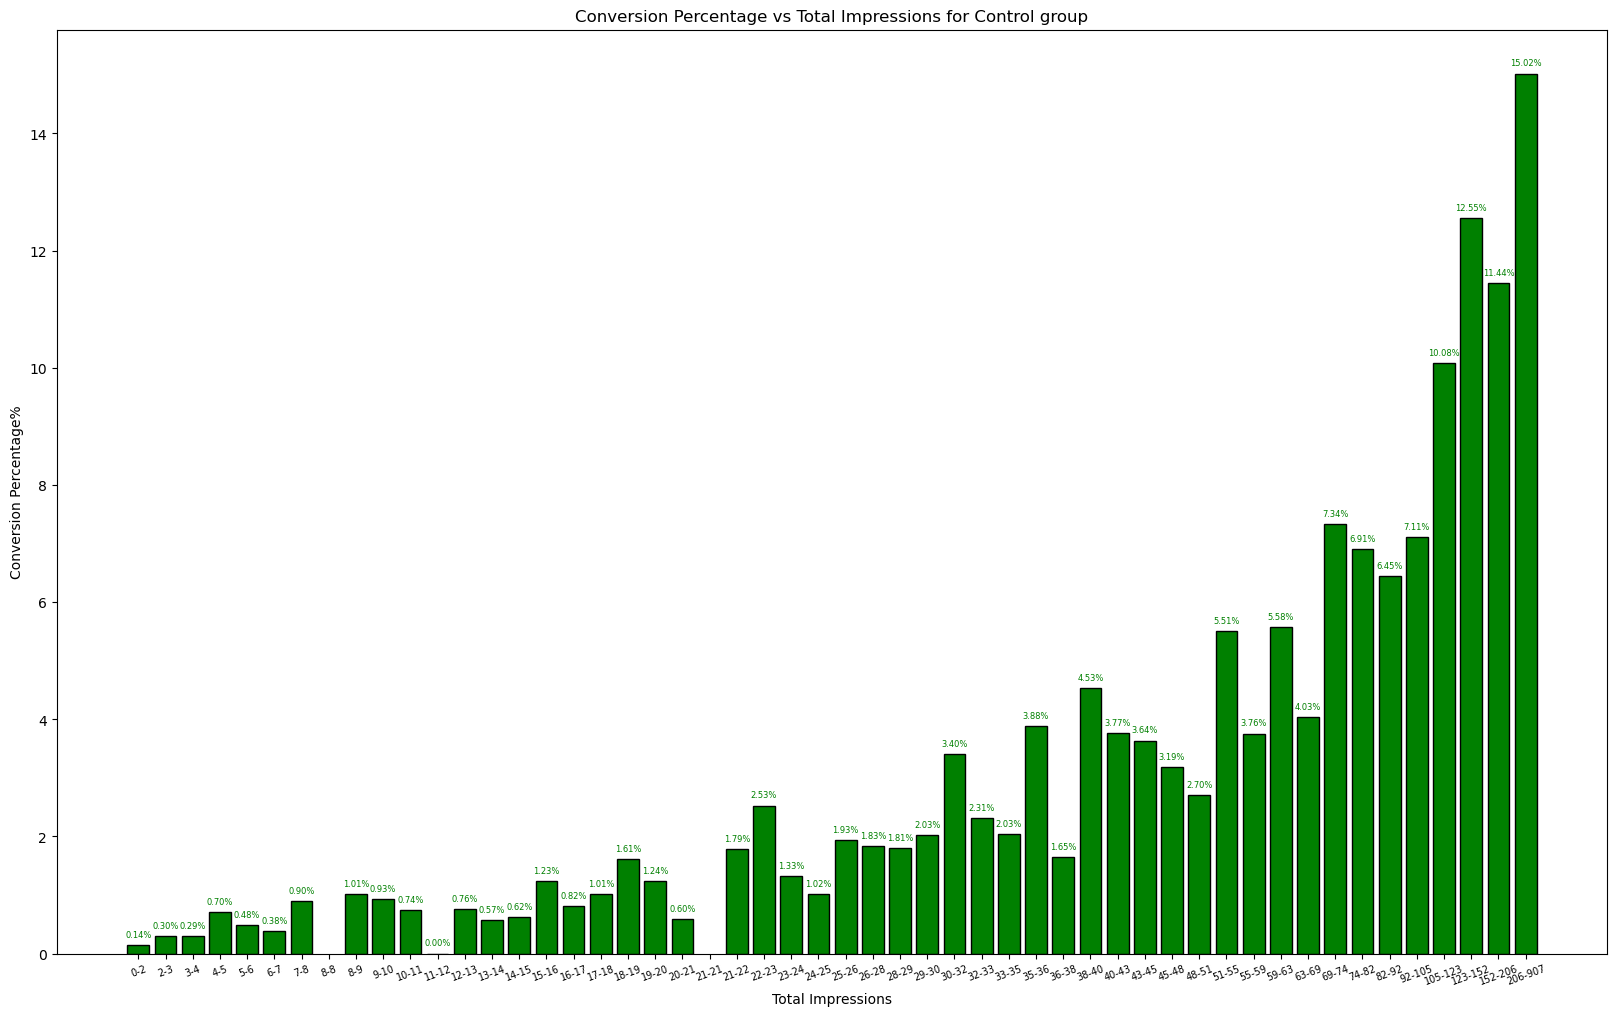

In [186]:
compute_graphs(test_group, "blue", "Test")
compute_graphs(control_group, "green", "Control")

In [193]:
count = (data['tot_impr'] > 200).sum()
print("Number of rows with greater than 200 impressions:", count)
print(f"Percentage of rows with total impressions greater than 200: {round(count / data.shape[0], 4)}%")

Number of rows with greater than 200 impressions: 5952
Percentage of rows with total impressions greater than 200: 0.0101%


# Q3 b) What do you infer from the charts? In what region is advertising most effective?

### For the test group:

The advertising is most effective when the number of impressions are between 116-143. And, the advertiasing is least effective when the number of impressions are between 0-2. 

Howeever, in general we can see the trend 87-201 is the region where the conversion rate is the highest.

We can infer that user conversion depends a lot based on the number of impressions they have seen. Therefore, it's extremely important to make sure that the number of impressions are in the adequate range to ensure that the advertisment campaign is succesful and users are converting.

People who saw 87 to 201 number of impressions were persuaded the most to make a purchase but the people who saw lesser number of impressions were not that persuaded enough to make the purchase.

Lower number of impressions <30 end up being very ineffective for adverstiment success perspectives. If impressions are less than 17, conversion rate is <1%.

Since conversion rate is the highest in the range when impressions are between 87 and 201, advertising is most effective for that number of impressions.

### For the control group:

The PSA notices were most effective when they were greater than 105.

For lower number of PSA notices, we can easily decipher that conversion rates are very low. Also, it's interesting to notice that conversion rates increase with the increase in PSA announcements but still remain a lot lower than ad conversion rates.

We can say that the PSA notice effectiveness was the highest when numnber of impressions is greater than 105. And, in general infernce wold be that conversion rates increase with increase in impressions.

# Q4. (a)

In [194]:
def plot_graph_Q4(x_vals, conv_rate, case, color, title):
    rates = []
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_vals, conv_rate, edgecolor = "black", color = color)
    for bar, rate in zip(bars, conv_rate):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0003, f"{rate:.2f}%", ha = 'center', va = 'bottom', color = color)
        rates.append(rate)
    plt.xlabel(f"{title}")
    plt.ylabel("Conversion Percentage%")
    plt.title("Conversion Percentage vs " + title + " for " + case + " group")
    plt.show()
    return rates

In [195]:
def compute_graphs_Q4(dataframe, col_name, case, color, title):
    curr_df = dataframe.copy()
    group_conversion_rate = (curr_df.groupby(col_name)["converted"].sum() / curr_df.groupby(col_name)["converted"].count()) * 100
    rates = plot_graph_Q4(group_conversion_rate.index, group_conversion_rate.values, case, color, title)
    return rates

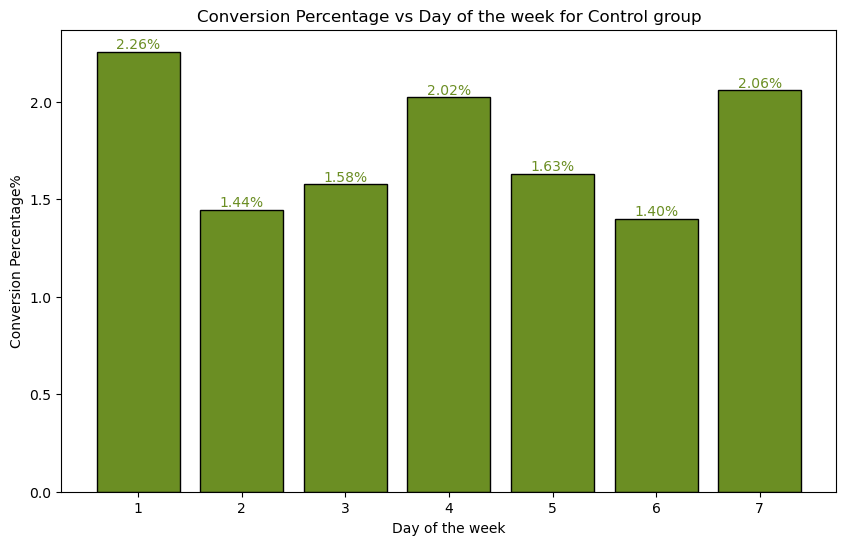

In [196]:
rates_days_ctrl = compute_graphs_Q4(control_group, "mode_impr_day", "Control", "olivedrab", "Day of the week")

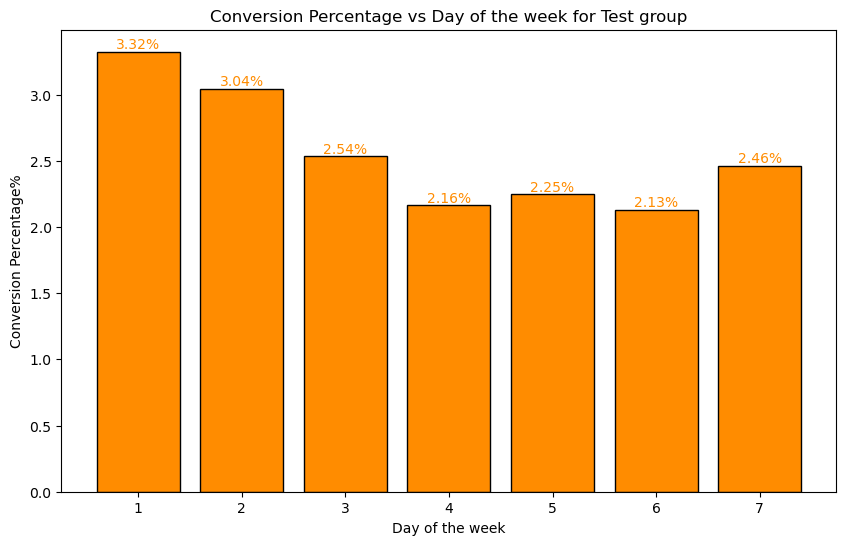

In [197]:
rates_days_test = compute_graphs_Q4(test_group, "mode_impr_day", "Test", "darkorange", "Day of the week")

# Q4. (b)

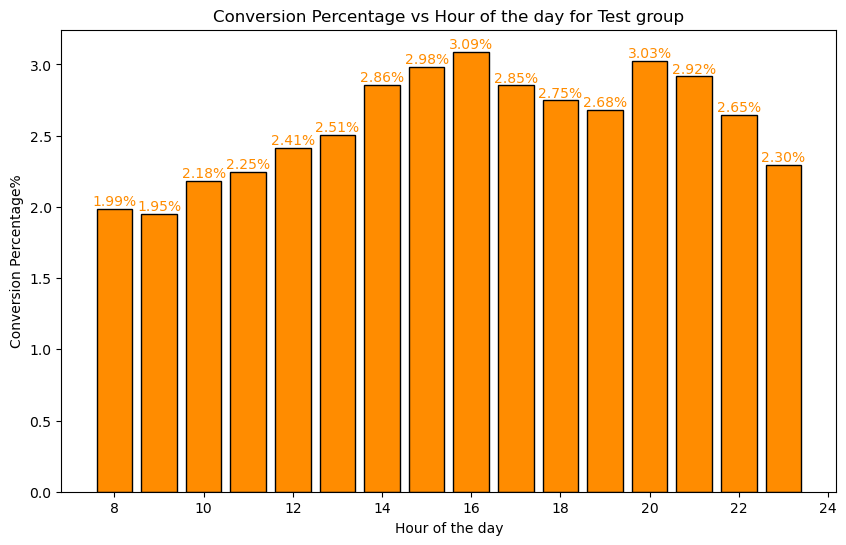

In [198]:
filter_hours = test_group[test_group["mode_impr_hour"] >= 8]
rates_hours_test = compute_graphs_Q4(filter_hours, "mode_impr_hour", "Test", "darkorange", "Hour of the day")

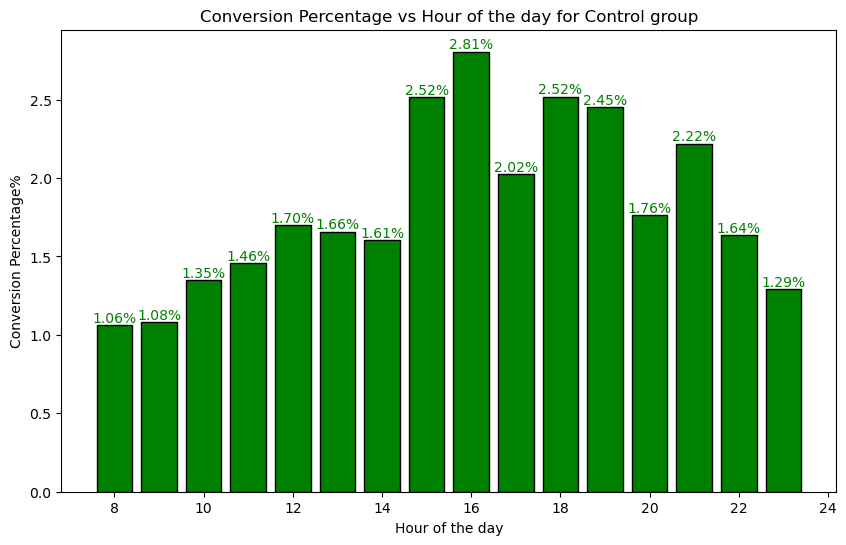

In [199]:
filter_hours_control = control_group[control_group["mode_impr_hour"] >= 8]
rates_hours_ctrl = compute_graphs_Q4(filter_hours_control, "mode_impr_hour", "Control", "green", "Hour of the day")

# Q4. (c) 

### What days/hours is advertising most/least effective?

In [200]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daywise_tuples_ctrl = [(days[i], rates_days_ctrl[i]) for i in range(len(rates_days_ctrl))]
sorted_daywise_tuples_ctrl = sorted(daywise_tuples_ctrl, key=lambda x: x[1])

daywise_tuples_test = [(days[i], rates_days_test[i]) for i in range(len(rates_days_test))]
sorted_daywise_tuples_test = sorted(daywise_tuples_test, key=lambda x: x[1])

hourwise_tuples_ctrl = [(i + 8, rates_hours_ctrl[i]) for i in range(len(rates_hours_ctrl))]
sorted_hourwise_tuples_ctrl = sorted(hourwise_tuples_ctrl, key=lambda x: x[1])

hourwise_tuples_test = [(i + 8, rates_hours_test[i]) for i in range(len(rates_hours_test))]
sorted_hourwise_tuples_test = sorted(hourwise_tuples_test, key=lambda x: x[1])

In [201]:
print("Control group conversion rates in sorted order daywise -\n")
for day in range(len(sorted_daywise_tuples_ctrl)):
    print(sorted_daywise_tuples_ctrl[day])
    
print("\nTest group conversion rates in sorted order daywise -\n")
for day in range(len(sorted_daywise_tuples_test)):
    print(sorted_daywise_tuples_test[day])

Control group conversion rates in sorted order daywise -

('Saturday', 1.3995801259622114)
('Tuesday', 1.4447884416924663)
('Wednesday', 1.5759312320916905)
('Friday', 1.630291874835656)
('Thursday', 2.0230473751600515)
('Sunday', 2.059496567505721)
('Monday', 2.2558537978298117)

Test group conversion rates in sorted order daywise -

('Saturday', 2.130656582320246)
('Thursday', 2.1637138485273844)
('Friday', 2.246495129778729)
('Sunday', 2.4619831900111744)
('Wednesday', 2.5355860394223564)
('Tuesday', 3.044037976720485)
('Monday', 3.3241196108697997)


## Days -

For the control group, the day with the most effective advertising is Monday (Day 1).
For the test group, the day with the most effective advertising is also Monday (Day 1).

For the control group, the day with the least effective advertising is Saturday (Day 6).
For the test group, the day with the least effective advertising is also Saturday (Day 6).

In [202]:
print("Control group conversion rates in sorted order hourwise -\n")
for hour in range(len(sorted_hourwise_tuples_ctrl)):
    print(sorted_hourwise_tuples_ctrl[hour])

Control group conversion rates in sorted order hourwise -

(8, 1.062215477996965)
(9, 1.0815307820299502)
(23, 1.2924071082390953)
(10, 1.3468013468013467)
(11, 1.455604075691412)
(14, 1.6051364365971106)
(22, 1.6357688113413305)
(13, 1.6589861751152075)
(12, 1.6990291262135921)
(20, 1.7641597028783658)
(17, 2.0245842371655822)
(21, 2.2201665124884364)
(19, 2.4513947590870666)
(15, 2.516411378555799)
(18, 2.5177025963808024)
(16, 2.8054862842892767)


In [204]:
print("Test group conversion rates in sorted order hourwise -\n")
for hour in range(len(sorted_hourwise_tuples_test)):
    print(sorted_hourwise_tuples_test[hour])

Test group conversion rates in sorted order hourwise -

(9, 1.9528890678477955)
(8, 1.9860914662894862)
(10, 2.18401238852993)
(11, 2.2469365104532377)
(23, 2.297027676881363)
(12, 2.4138998187364606)
(13, 2.5063207650873913)
(22, 2.6455026455026456)
(19, 2.6809283828722275)
(18, 2.747005023830993)
(17, 2.8537420026781732)
(14, 2.8575344343178233)
(21, 2.917459768125973)
(15, 2.9844825574612064)
(20, 3.0273647920706743)
(16, 3.089286210827795)


## Hours - 

For the control group, the hour with the most effective advertising is hour 16.
For the test group, the hour with the most effective advertising is also hour 16.

For the control group, the hour with the least effective advertising is hour 8.
For the test group, the hour with the least effective advertising is hour 9.

## Answer 4 (c)

Overall, the best time to advertise should be on Monday (Day 1) at hour 16 considering that day and hour are linearly independent.

Overall, the worst time to advertise should be on Saturday (Day 6) at hour 8 or 9 considering that day and hour are linearly independent.